In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("EV BIKES COMPINES.csv")
data.head(5)

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Ampere Magnus EX,104758,121,53,90,7,1200
1,Ampere Magnus Pro,66053,45,25,94,10,250
2,Ampere REO,61993,45,25,88,10,250
3,Ampere Zeal,96544,120,53,80,7,1200
4,Ather 450X,135489,111,90,108,8,3000


In [3]:
df=pd.DataFrame(data)

In [4]:
df.head(5)

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Ampere Magnus EX,104758,121,53,90,7,1200
1,Ampere Magnus Pro,66053,45,25,94,10,250
2,Ampere REO,61993,45,25,88,10,250
3,Ampere Zeal,96544,120,53,80,7,1200
4,Ather 450X,135489,111,90,108,8,3000


In [5]:
df.isnull().sum()

Model Name                     0
Price                          0
Riding Range (km)              0
Top Speed (kmph)               0
Weight (kg)                    0
Battery Charging Time (hrs)    0
Rated Power (W)                0
dtype: int64

In [6]:
print(df.dtypes)

Model Name                     object
Price                           int64
Riding Range (km)               int64
Top Speed (kmph)                int64
Weight (kg)                     int64
Battery Charging Time (hrs)     int64
Rated Power (W)                 int64
dtype: object


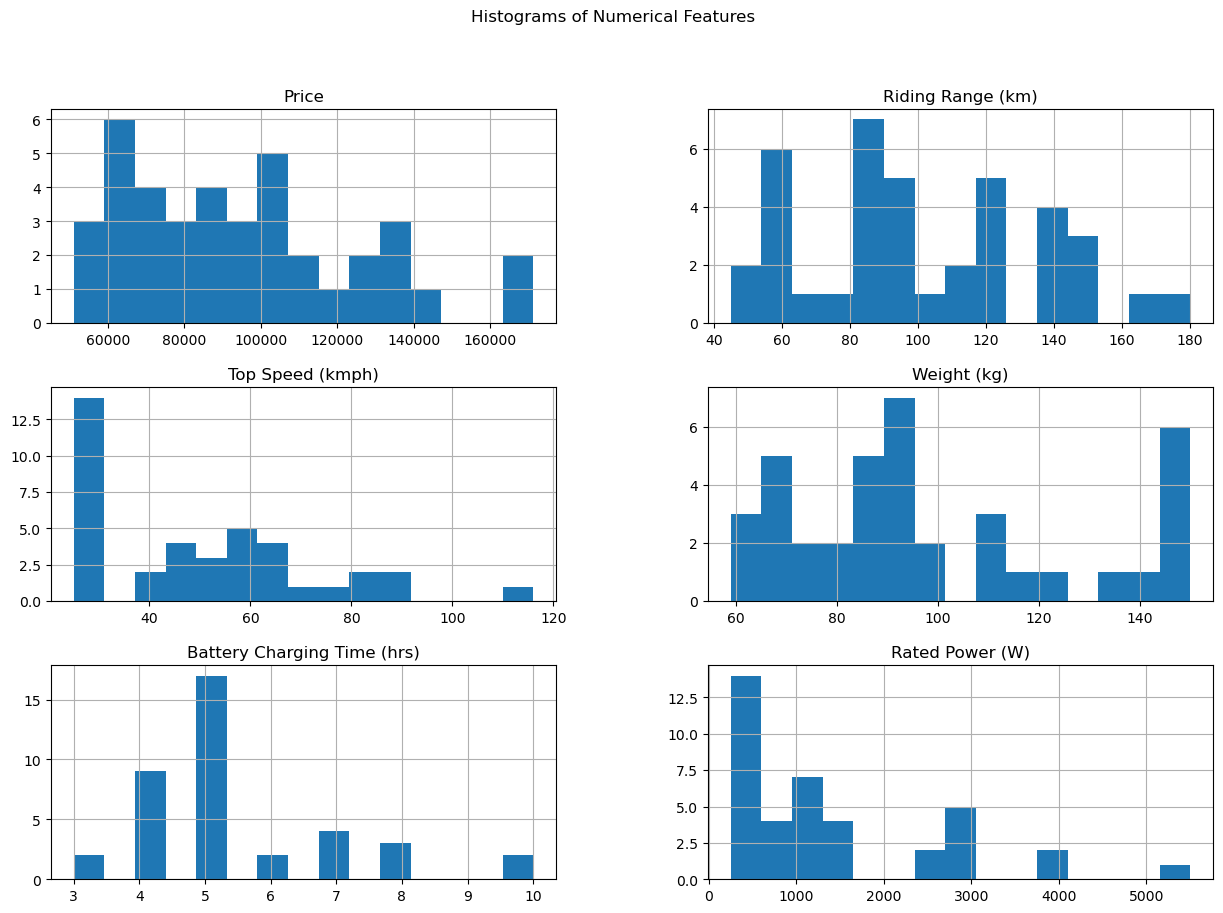

In [12]:
# Plot histograms for numerical features
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

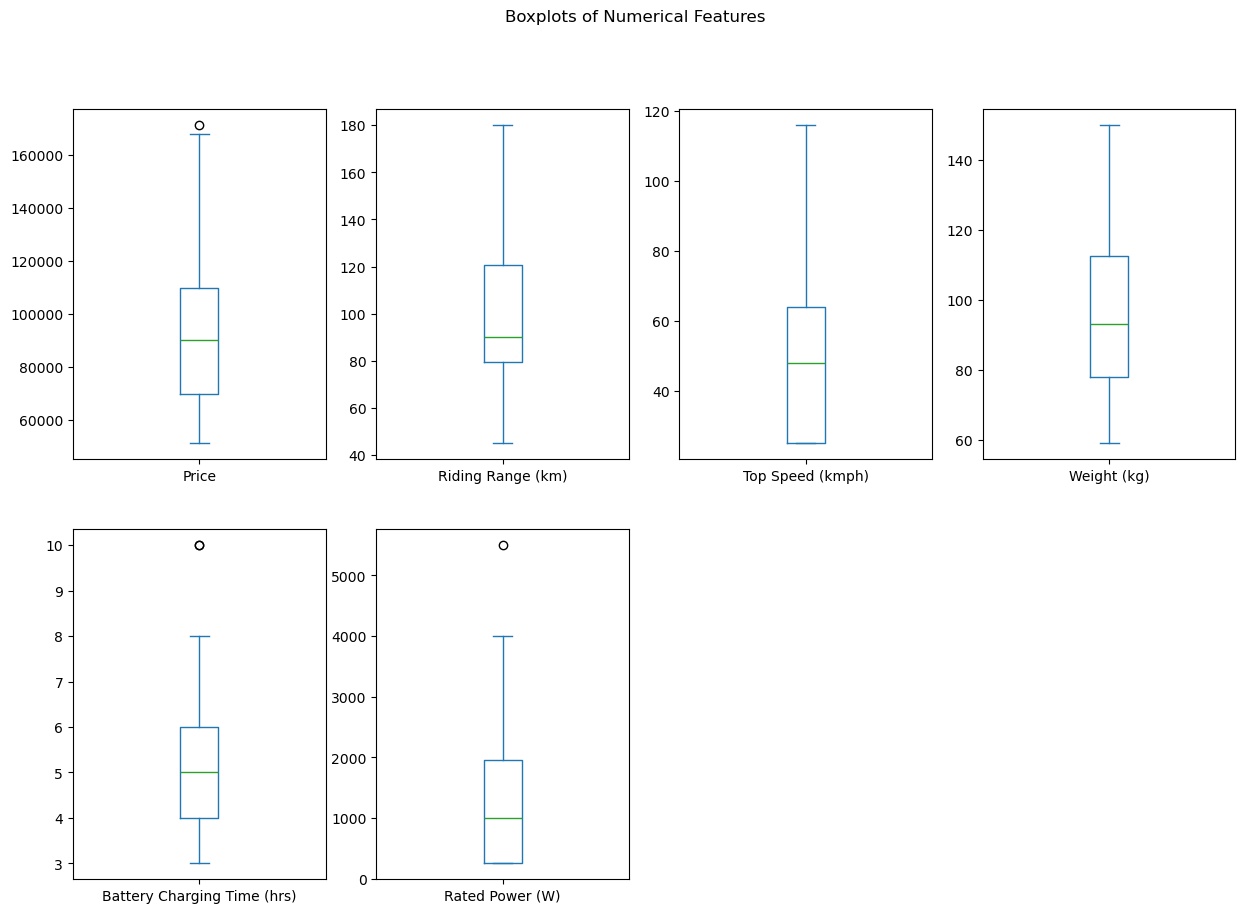

In [8]:
# Plot boxplots for numerical features to check for outliers
df.plot(kind='box', subplots=True, layout=(2, 4), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle('Boxplots of Numerical Features')
plt.show()

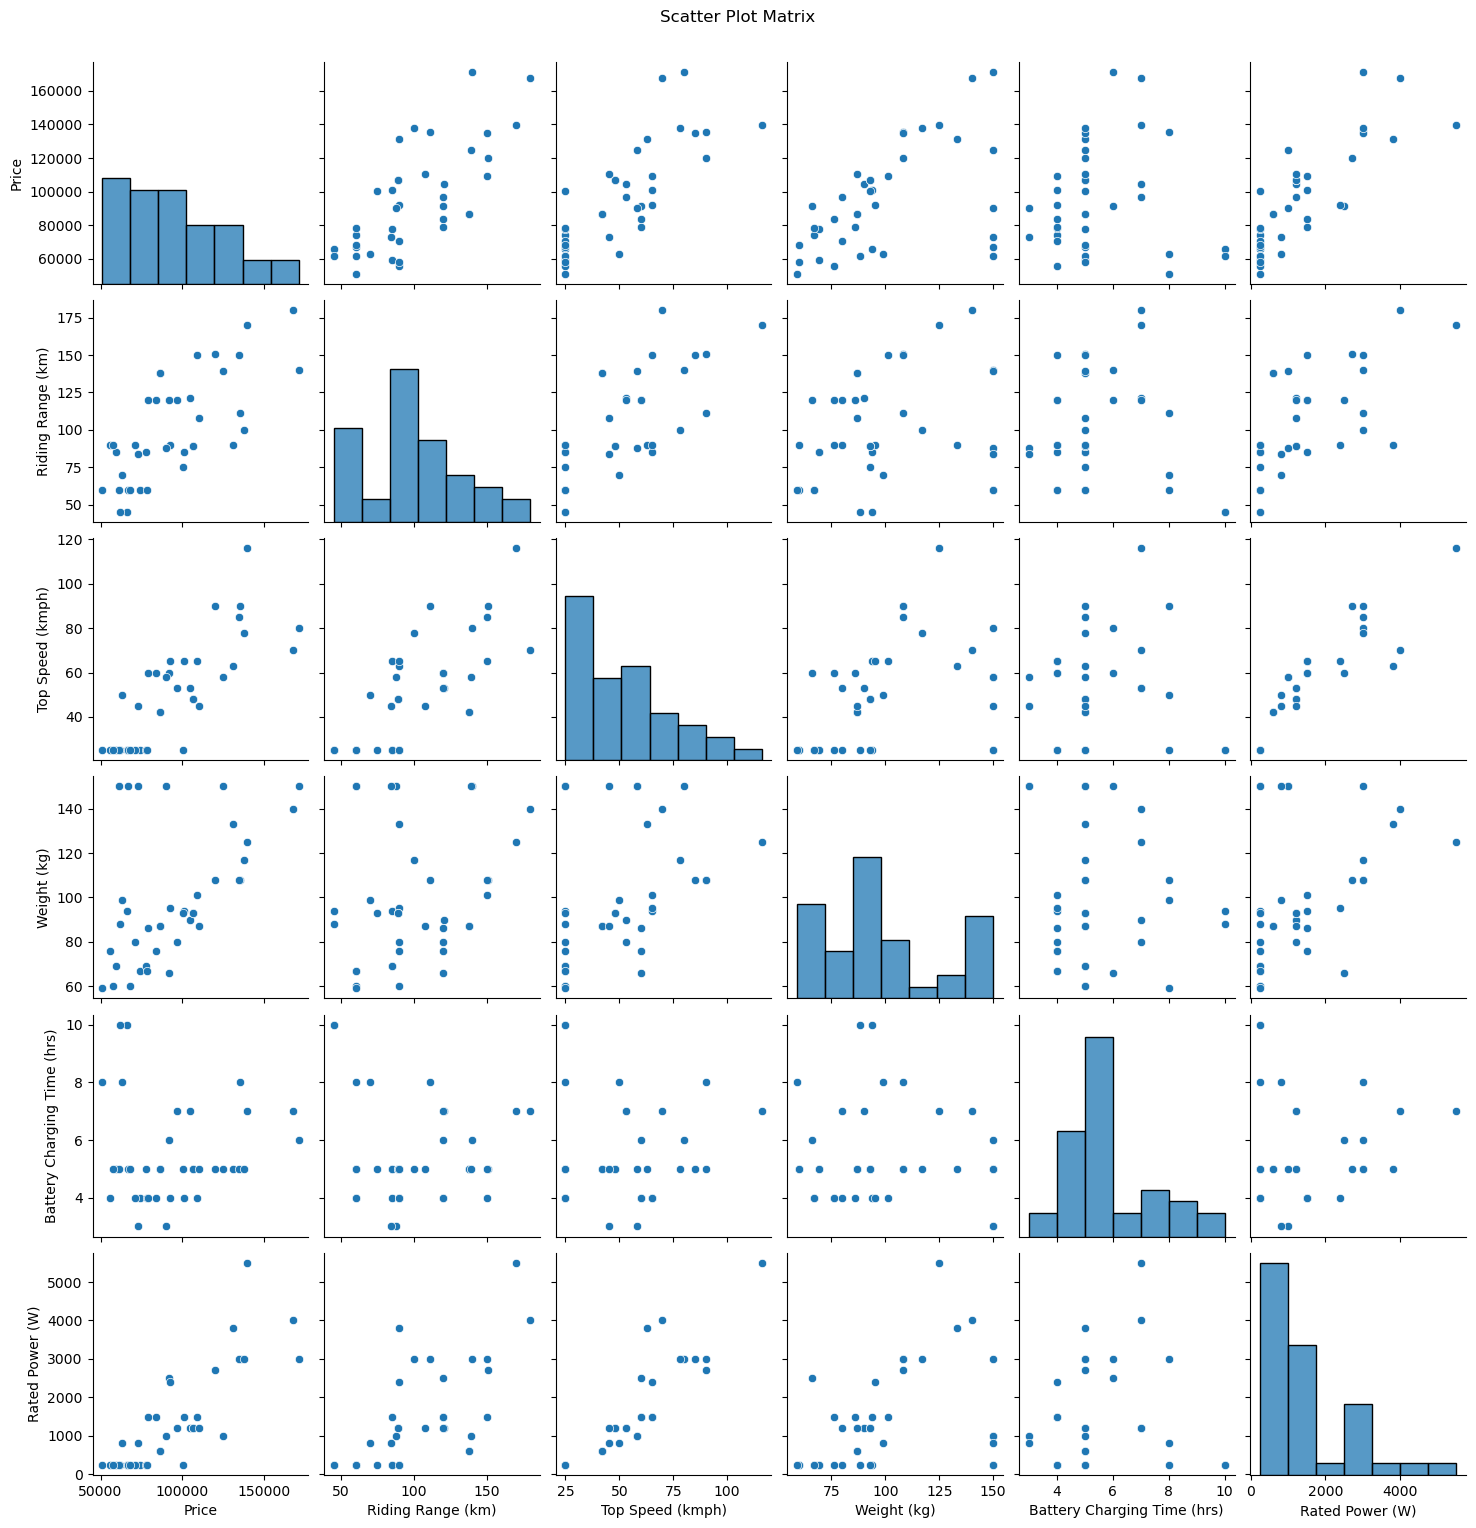

In [13]:
# Scatter plot matrix
sns.pairplot(df)
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

In [22]:
correlation_matrix

,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
Price,1.000000,0.715643,0.802512,0.505797,0.042036,0.828568
Riding Range (km),0.715643,1.000000,0.743750,0.263949,-0.092822,0.678564
Top Speed (kmph),0.802512,0.743750,1.000000,0.427258,0.035217,0.910385
Weight (kg),0.505797,0.263949,0.427258,1.000000,-0.070495,0.413372
Battery Charging Time (hrs),0.042036,-0.092822,0.035217,-0.070495,1.000000,0.110649
Rated Power (W),0.828568,0.678564,0.910385,0.413372,0.110649,1.000000


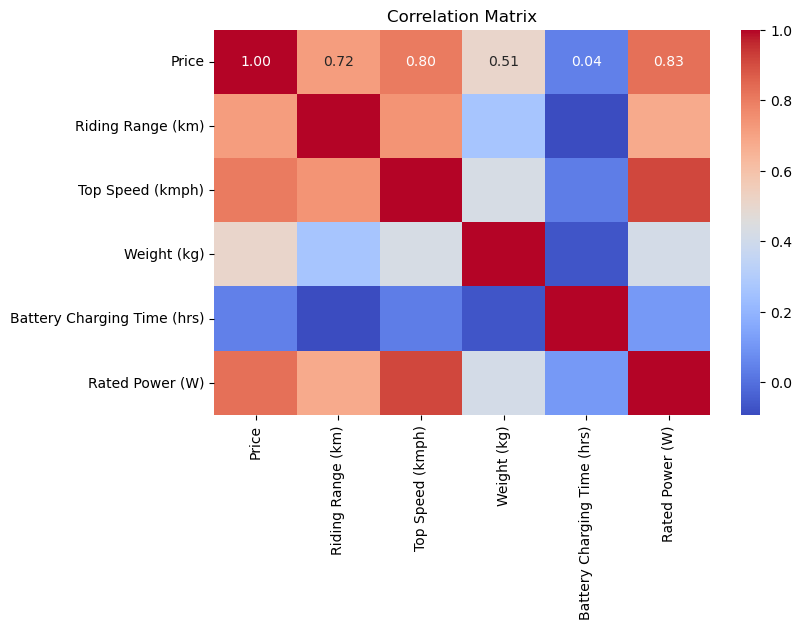

In [21]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

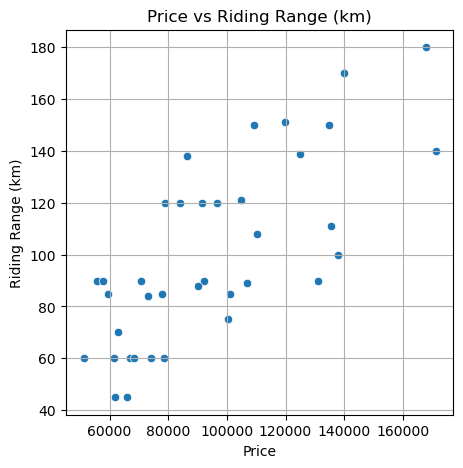

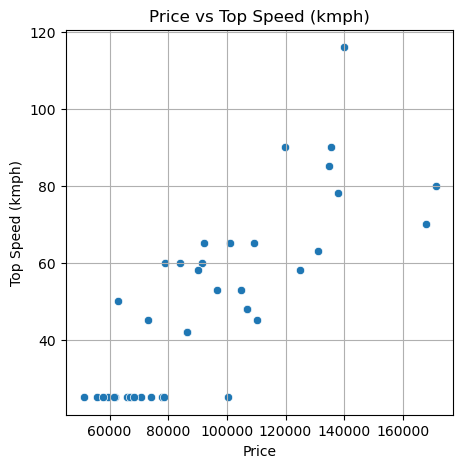

In [25]:
# Price vs Riding Range
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Price', y='Riding Range (km)', data=df)
plt.title('Price vs Riding Range (km)')
plt.xlabel('Price')
plt.ylabel('Riding Range (km)')
plt.grid(True)
plt.show()

# Price vs Top Speed
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Price', y='Top Speed (kmph)', data=df)
plt.title('Price vs Top Speed (kmph)')
plt.xlabel('Price')
plt.ylabel('Top Speed (kmph)')
plt.grid(True)
plt.show()


In [26]:
# Example: Price per km of range
df['Price per km of Range'] = df['Price'] / df['Riding Range (km)']

# Example: Battery Charging Time per km of range
df['Charging Time per km'] = df['Battery Charging Time (hrs)'] / df['Riding Range (km)']


R-squared: 0.73
Mean Absolute Error: 16137.69
Mean Squared Error: 339327229.72
Root Mean Squared Error: 18420.84


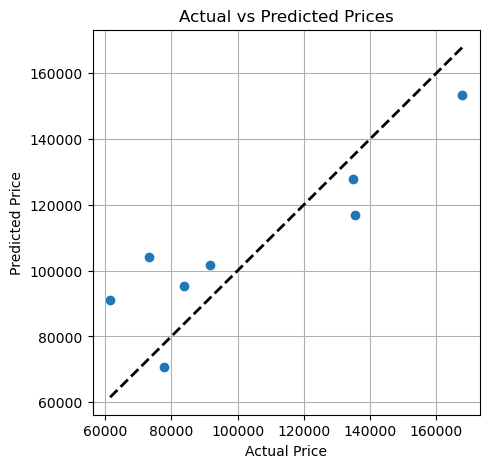

In [28]:
#regression analysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prepare data
X = df[['Riding Range (km)', 'Top Speed (kmph)', 'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)']]
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Evaluation metrics
print(f'R-squared: {r2_score(y_test, y_pred):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'Root Mean Squared Error: {mean_squared_error(y_test, y_pred, squared=False):.2f}')

# Plot Actual vs Predicted Prices
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()


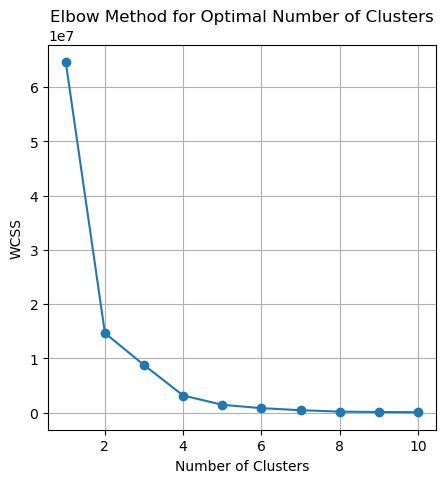

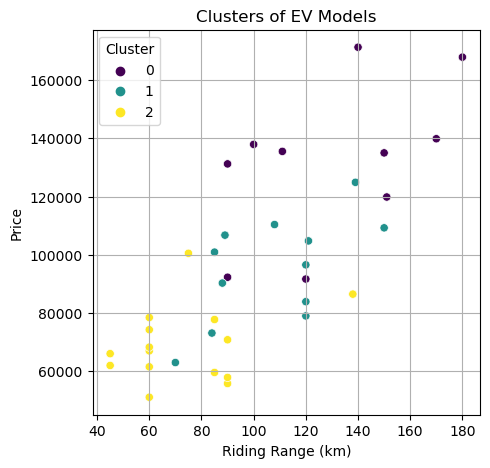

In [30]:
from sklearn.cluster import KMeans

# Prepare data
X = df[['Riding Range (km)', 'Top Speed (kmph)', 'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)']]

# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(5, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Apply KMeans with the optimal number of clusters
optimal_clusters = 3  # This is an example; choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Riding Range (km)', y='Price', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of EV Models')
plt.xlabel('Riding Range (km)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare data for VIF calculation
X = df[['Riding Range (km)', 'Top Speed (kmph)', 'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                       Feature        VIF
0            Riding Range (km)  17.551737
1             Top Speed (kmph)  38.537876
2                  Weight (kg)  11.286114
3  Battery Charging Time (hrs)   6.922099
4              Rated Power (W)   9.980986


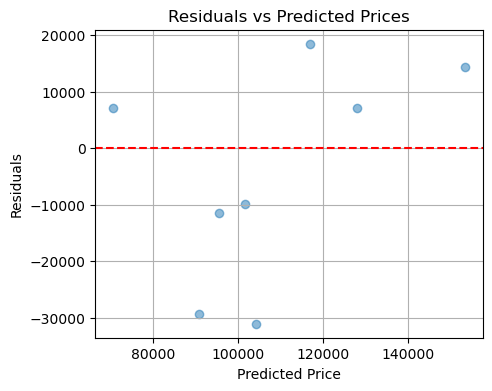

In [33]:
residuals = y_test - y_pred

plt.figure(figsize=(5, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.grid(True)
plt.show()

In [34]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R-squared Scores: {cv_scores}')
print(f'Average Cross-Validation R-squared Score: {cv_scores.mean():.2f}')


Cross-Validation R-squared Scores: [ 0.78653564  0.4119085   0.04633247 -1.02352671  0.90028971]
Average Cross-Validation R-squared Score: 0.22


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Example: Random Forest model with Grid Search
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation R-squared score: {grid_search.best_score_:.2f}')


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation R-squared score: 0.40


In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predict on the test set
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics
print(f'Test R-squared: {r2_score(y_test, y_test_pred):.2f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'Test Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.2f}')
print(f'Test Root Mean Squared Error: {mean_squared_error(y_test, y_test_pred, squared=False):.2f}')



Test R-squared: 0.98
Test Mean Absolute Error: 3859.85
Test Mean Squared Error: 20606873.12
Test Root Mean Squared Error: 4539.48


In [41]:
importances = grid_search.best_estimator_.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


                       Feature  Importance
4              Rated Power (W)    0.646431
1             Top Speed (kmph)    0.176797
2                  Weight (kg)    0.092773
0            Riding Range (km)    0.061766
3  Battery Charging Time (hrs)    0.022233
